##### Multi-Way Decomposition CPD from scratch

These are the simplest cpd and Tucker decomposition for nd-arrays

cpd or tensor component analysis (TCA)  is the PCA extension for PCA
Tucker is the SVD extension for SVD


Input: N-order tensor 𝜒𝜖 ℝ^(I1,I2,… ,In) , tensor rank R
Output: coefficients 𝜆n for n=1:N, factor matrices 𝐴^n 𝜖 ℝ^(In,Rn) for n=1:N

Step 1: Initialize: randomly initialize 𝐴^N for n=1:N

repeat
for n = 1, …, N do
𝑇_n = 𝐴(1)^T 𝐴(1) ∗ … ∗ 𝐴(n-1)^T 𝐴(n-1) ∗ 𝐴(n+1)^T 𝐴(n+1) ∗ … ∗ 𝐴(N)^T 𝐴(N)
𝐴(n) = 𝜒(n)(𝐴(N) ⊙ … ⊙ 𝐴(n+1) ⊙ 𝐴(n-1) ⊙ … ⊙ 𝐴(1))𝑇n
end for
until the convergence criterion is satisfied

The data is from https://www.cell.com/neuron/fulltext/S0896-6273(18)30387-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0896627318303878%3Fshowall%3Dtrue

It cintains three interconnected, low-dimensional descriptions of neural data: 
neuron factors, reflecting cell assemblies; 
temporal factors, reflecting rapid circuit dynamics mediating perceptions, thoughts, and actions within each trial; 
and trial factors, describing both long-term learning 

and trial-to-trial changes in cognitive state.

The key idea is to organize neural firing rates into a third-order tensor (a three-dimensional data array) with three axes corresponding to individual neurons, time within trial, and trial number. We then fit a tensor decomposition model (CANDECOMP/PARAFAC) 

In [81]:
time_factor = np.load("data/time_factor.npy") # 500 time steps
neuron_factor = np.load("data/neuron_factor.npy") # 50 neurons
trial_factor = np.load("data/trial_factor.npy") # 100 trials
latent = np.load("data/latent.npy") # trial-to-trial
observed = np.load("data/observed.npy") # This dataset is naturally represented as an N×T×K array of firing rates, which is known in mathematics as a third-order tensor. Each element in this tensor, xntk, denotes the firing rate of neuron n at time t within trial k. Here, the indices n, t, and k each range from 1 to N, T, and K, respectively.

In [159]:
observed.shape

(500, 50, 100)

In [160]:
observed[0,0,0]

-0.07747956098692964

In [161]:
time_factor[0]

array([2.37609483e-11, 1.35336370e-01, 0.00000000e+00])

In [151]:
observed

array([[[-7.74795610e-02, -7.97418312e-02, -8.21405010e-02, ...,
         -8.21405010e-02, -7.97418312e-02, -7.74795610e-02],
        [ 4.33300148e-02,  4.45951769e-02,  4.59366197e-02, ...,
          4.59366197e-02,  4.45951769e-02,  4.33300148e-02],
        [-1.51272662e-02, -1.55689565e-02, -1.60372776e-02, ...,
         -1.60372776e-02, -1.55689565e-02, -1.51272662e-02],
        ...,
        [-7.15330789e-02, -7.36217221e-02, -7.58362963e-02, ...,
         -7.58362963e-02, -7.36217221e-02, -7.15330789e-02],
        [-2.41955373e-02, -2.49020054e-02, -2.56510688e-02, ...,
         -2.56510688e-02, -2.49020054e-02, -2.41955373e-02],
        [ 2.24504612e-02,  2.31059762e-02,  2.38010142e-02, ...,
          2.38010143e-02,  2.31059762e-02,  2.24504613e-02]],

       [[-7.99938524e-02, -8.23295356e-02, -8.48060447e-02, ...,
         -8.48060447e-02, -8.23295356e-02, -7.99938524e-02],
        [ 4.47361184e-02,  4.60423362e-02,  4.74273102e-02, ...,
          4.74273103e-02,  4.60423363e

In [120]:
def normalize(x, lower=0, upper=1, axis=0):
    return (x - x.min(axis=axis)) / (x.max(axis=axis) - x.min(axis=axis))

factors_actual = (normalize(time_factor), normalize(neuron_factor), normalize(trial_factor))
factors_actual

(array([[0.00000000e+00, 1.35336357e-01, 0.00000000e+00],
        [2.63316159e-12, 1.39728162e-01, 0.00000000e+00],
        [5.55150468e-12, 1.44225410e-01, 0.00000000e+00],
        ...,
        [1.21228856e-06, 3.22137798e-09, 4.30261556e-04],
        [5.70358568e-07, 1.53564167e-09, 1.07999997e-04],
        [2.62486385e-07, 0.00000000e+00, 0.00000000e+00]]),
 array([[0.62043571, 0.02645137, 0.46016174],
        [0.76710544, 0.72575747, 0.71066155],
        [0.55495857, 0.38737756, 0.36588719],
        [0.49992487, 1.        , 0.56498666],
        [0.26684708, 0.44155832, 0.44348576],
        [0.27419369, 0.79290814, 0.24247145],
        [0.38947319, 0.41447952, 0.14152738],
        [0.74785842, 0.59375717, 0.24778828],
        [0.43771975, 0.50668519, 0.09584761],
        [0.60081184, 0.29231198, 0.40580506],
        [0.7387908 , 0.44142872, 0.35699612],
        [0.62454109, 0.70907532, 0.5089078 ],
        [0.66963538, 0.58745735, 0.10520852],
        [0.23019296, 0.19553707, 1.    

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis, PCA
import tensortools as tt
from tensortools.operations import unfold as tt_unfold, khatri_rao
import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac

def reconstruct(factors, rank=None):
    a, b, c = factors
    rank = rank if rank else a.shape[1]
    R1s = np.zeros((a.shape[0], b.shape[0], c.shape[0], rank))
    for i in range(rank):
        R1s[:, :, :, i] = rank_one_tensor(a[:, i], b[:, i], c[:, i])
    return R1s.sum(axis=3)

def plot_factors(factors, d=3):
    a, b, c = factors
    rank = a.shape[1]
    fig, axes = plt.subplots(rank, d, figsize=(8, int(rank * 1.2 + 1)))
    factors_name = ["Time", "Features", "Time"] if d==3 else ["Time", "Features"]
    for ind, (factor, axs) in enumerate(zip(factors[:d], axes.T)):
        axs[-1].set_xlabel(factors_name[ind])
        for i, (f, ax) in enumerate(zip(factor.T, axs)):
            sns.despine(top=True, ax=ax)
            ax.plot(f)
            axes[i, 0].set_ylabel("Factor " + str(i+1))
    fig.tight_layout()

def rank_one_tensor(a, b, c):
    """Returns a rank 1 tensor, given three vectors  
    """
    a = a.reshape(-1, 1).astype(np.float32)
    b = b.reshape(-1, 1).astype(np.float32)
    c = c.reshape(-1, 1).astype(np.float32)
    return np.tensordot(a * b.T, c, axes=0)[:, :, :, 0]

In [127]:
# Specify the tensor, and the rank (np. of factors)
X, rank = observed, 3

# Perform CP decompositon using TensorLy
factors_tl = parafac(X, rank=rank)

# Perform CP decomposition using tensortools
U = tt.cp_als(X, rank=rank, verbose=False)
factors_tt = U.factors.factors

In [128]:
# Reconstruct M, with the result of each library
M_tl = reconstruct(factors_tl[1], rank=rank)
M_tt = reconstruct(factors_tt)

In [129]:
# Compute the reconstruction error
rec_error_tl = np.mean((X-M_tl)**2)
rec_error_tt = np.mean((X-M_tt)**2)

(<Figure size 576x216 with 9 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 array([[list([<matplotlib.lines.Line2D object at 0x000001F61F2EE580>]),
         list([<matplotlib.lines.Line2D object at 0x000001F61F304340>]),
         list([<matplotlib.lines.Line2D object at 0x000001F61F304D60>])],
        [list([<matplotlib.lines.Line2D object at 0x000001F61F321070>]),
         list([<matplotlib.lines.Line2D object at 0x000001F61F31C190>]),
         list([<matplotlib.lines.Line2D object at 0x000001F61F34F340>])],
        [list([<matplotlib.lines.Line2D object at 0x000001F61F33E5B0>]),
         list([<matplotlib.lines.Line2D object at 0x000001F61F33E970>]),
         list([<matplotlib.lines.Line2D object at 0x000001F61F34FAC0>])]],
       dtype=object))

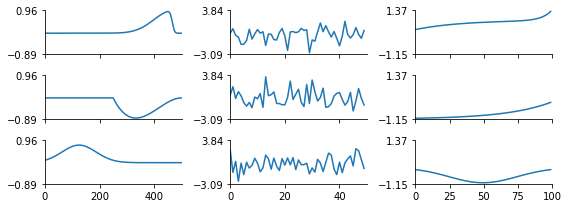

In [109]:
# plot the decomposed factors
#tt.plot_factors(factors_tl)
tt.plot_factors(U.factors)

In [ ]:
U.factors.factors

In [122]:
factors_tl

(weights, factors) : rank-3 CPTensor of shape (500, 50, 100) 

In [123]:
[f.shape for f in factors_tl[1]]

[(500, 3), (50, 3), (100, 3)]

In [102]:
full_tensor = tl.cp_to_tensor(factors_tl)
np.sqrt(np.mean((full_tensor-X)**2))

2.1725068308564687e-07

In [98]:
factors_tt = np.array(factors_tt)
factors_tt[0].shape

(500, 3)

In [99]:
factors_tt[1].shape

(50, 3)

In [100]:
factors_tt[2].shape

(100, 3)

In [ ]:
full_tensor = tl.cp_to_tensor(factors_tl)
np.sqrt(np.mean((full_tensor-X)**2))

In [116]:
# 3-way parafac/cpd from: https://medium.com/@mohammadbashiri93/tensor-decomposition-in-python-f1aa2f9adbf4


def decompose_three_way(tensor, rank, max_iter=501, verbose=False):

    # a = np.random.random((rank, tensor.shape[0]))
    b = np.random.random((rank, tensor.shape[1]))
    c = np.random.random((rank, tensor.shape[2]))

    for epoch in range(max_iter):
        # optimize a
        input_a = khatri_rao([b.T, c.T])
        target_a = tl.unfold(tensor, mode=0).T
        a = np.linalg.solve(input_a.T.dot(input_a), input_a.T.dot(target_a))

        # optimize b
        input_b = khatri_rao([a.T, c.T])
        target_b = tl.unfold(tensor, mode=1).T
        b = np.linalg.solve(input_b.T.dot(input_b), input_b.T.dot(target_b))

        # optimize c
        input_c = khatri_rao([a.T, b.T])
        target_c = tl.unfold(tensor, mode=2).T
        c = np.linalg.solve(input_c.T.dot(input_c), input_c.T.dot(target_c))

        if verbose and epoch % int(max_iter * .2) == 0:
            res_a = np.square(input_a.dot(a) - target_a)
            res_b = np.square(input_b.dot(b) - target_b)
            res_c = np.square(input_c.dot(c) - target_c)
            print("Epoch:", epoch, "| Loss (C):", res_a.mean(), "| Loss (B):", res_b.mean(), "| Loss (C):", res_c.mean())

    return a.T, b.T, c.T

In [133]:
factors_np = decompose_three_way(X, rank, verbose=False)

In [134]:
a, b, c = factors_np
factors = (normalize(a), normalize(b), normalize(c))

In [135]:
M_np = reconstruct(factors_np)
rec_error_np = np.mean((X-M_np)**2)

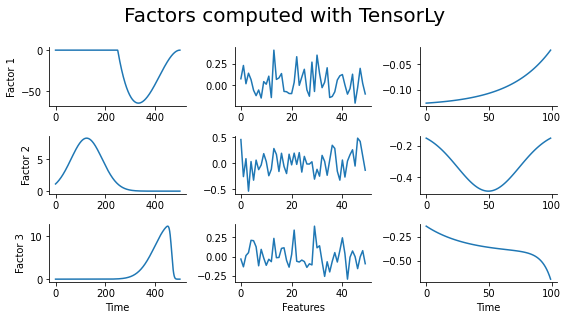

In [131]:
# plot the decomposed factors from TensorLy
plot_factors(factors_tl[1], d=3)
plt.suptitle("Factors computed with TensorLy", y=1.1, fontsize=20);

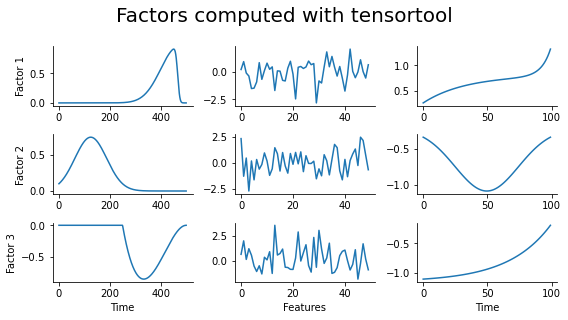

In [132]:
# plot the decomposed factors from TensorLy
plot_factors(factors_tt, d=3)
plt.suptitle("Factors computed with tensortool", y=1.1, fontsize=20);

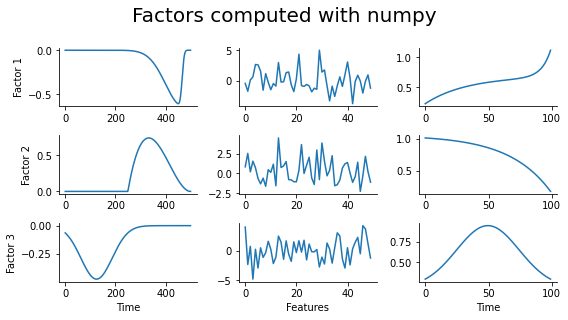

In [137]:
plot_factors(factors_np, d=3)
plt.suptitle("Factors computed with numpy", y=1.1, fontsize=20);

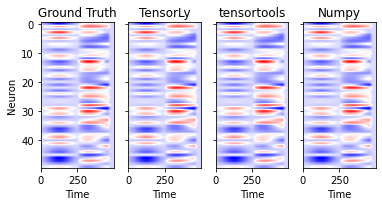

In [136]:
fig, axes = plt.subplots(1, 4, sharey=True)
tensors = [X, M_tl, M_tt, M_np]
titles = ["Ground Truth", "TensorLy", "tensortools", "Numpy"]
trial_num = 50

for title, tensor, ax in zip(titles, tensors, axes):
    ax.imshow(tensor[:, :, trial_num].T, cmap='bwr', aspect=20)
    ax.set_xlabel("Time")
    ax.set_title(title)
axes[0].set_ylabel("Neuron");

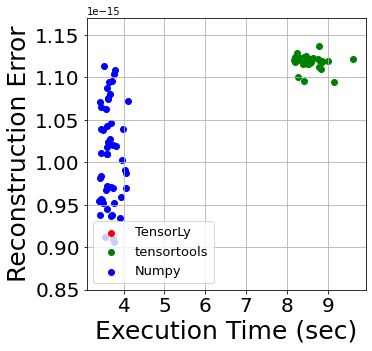

In [140]:
import timeit

iter_num = 50
times = {'tl': [], 'tt': [], 'np': []}
rec_errors = {'tl': [], 'tt': [], 'np': []}

# TensorLy
for i in range(iter_num):
    start_time = timeit.default_timer()
    factors_tl = parafac(X, rank=rank)
    end_time = timeit.default_timer() - start_time
    times['tl'].append(end_time)
    M_tl = reconstruct(factors_tl[1])
    rec_error_tl = np.mean((X-M_tl)**2)
    rec_errors['tl'].append(rec_error_tl)
    print("TensorLy | Iteration: {} / {} | time take: {} sec".format(i+1, iter_num, end_time), end="\r")

# tensortools
for i in range(iter_num):
    start_time = timeit.default_timer()
    U = tt.cp_als(X, rank=rank, tol=0, max_iter=200, verbose=False)
    factors_tt = U.factors.factors
    end_time = timeit.default_timer() - start_time
    times['tt'].append(end_time)
    M_tt = reconstruct(factors_tt)
    rec_error_tt = np.mean((X-M_tt)**2)
    rec_errors['tt'].append(rec_error_tt)
    print("tensortools | Iteration: {} / {} | time take: {} sec".format(i+1, iter_num, end_time), end="\r")

# Numpy
for i in range(iter_num):
    start_time = timeit.default_timer()
    factors_np = decompose_three_way(X, rank, max_iter=200, verbose=False)
    end_time = timeit.default_timer() - start_time
    times['np'].append(end_time)
    M_np = reconstruct(factors_np)
    rec_error_np = np.mean((X-M_np)**2)
    rec_errors['np'].append(rec_error_np)
    print("Numpy | Iteration: {} / {} | time take: {} sec".format(i+1, iter_num, end_time),end="\r")
    
plt.figure(figsize=(5, 5)) #, dpi=200)
factor = 1e15
plt.scatter(np.array(times['tl']), np.array(rec_errors['tl']), c='red', label="TensorLy")
plt.scatter(np.array(times['tt']), np.array(rec_errors['tt']), c='green', label="tensortools")
plt.scatter(np.array(times['np']), np.array(rec_errors['np']), c='b', label="Numpy")
plt.xlabel("Execution Time (sec)", fontsize=25)
plt.ylabel("Reconstruction Error", fontsize=25)
plt.ylim(0.85 * 1e-15, 1.17 * 1e-15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="lower left", fontsize=13);
plt.grid()

# plt.savefig("metric-1.png", transparent=True, bbox_inches='tight')

In [211]:
#from scipy.linalg import khatri_rao

import tensorly as tl

from tensortools.operations import unfold as tt_unfold, khatri_rao

'''
def khatri_rao(a, u):
    c = a[...,:,np.newaxis,:] * u[...,np.newaxis,:,:]
    # collapse the first two axes
    return c.reshape((-1,) + c.shape[2:])
'''


def cpd(tensor, rank=2, max_iter = 100, epsilon=1e-10, verbose = True):   
    N = len(tensor.shape) # order of tensor X

    # initialise factor matrices randomly
    A = []
    for n in range(N):
        In =tensor.shape[n]
        print ("mode " + str(n) + " / " + str(N) + " factor matrix shape (" + str(In) + ", "+ str(rank) + ")")
        A.append (np.random.rand(rank, In)) 
    # factorise   
    
    print ("A initialised : ")
    print (A)
    factors = []
    prev_factors = []
    
    
        
    for epoch in range(max_iter): # to exit when values are too close, or for loop for max iterations or both  
        prev_factors = factors
        factors = []
        
        # for 3-way decompose, each mode a, b, c is computed as for a below
        '''
        # optimize a
        input_a = khatri_rao([b.T, c.T]) # from the other two modes
        target_a = tl.unfold(tensor, mode=0).T
        a = np.linalg.solve(input_a.T.dot(input_a), input_a.T.dot(target_a))
        '''
        
        for n in range(N): # for each mode
            print ("mode " + str(n) + " / " + str(N))
            #In =tensor.shape[n]
            #Tn = np.ones((rank, In)) # ((In,rank))           
            #print ("Tn initialised :" )
            #print (Tn)
            
            cnt = 0
            for j in range(N): # for each other mode
                if n != j: # skip the current mode to ALS
                    if cnt == 0:
                        input_a = A[j] # np.ones((rank, In)) # ((In,rank))
                    else:                
                        #Tn = np.dot (Tn, np.dot(np.transpose(A[j]), A[j]))
                        input_a = khatri_rao ([input_a, A[j]]) # An in the pseudo-code
                    cnt += 1
            print ("input_a: ", input_a.shape)
            print (input_a)
            target_a = tl.unfold(tensor, mode=n).T 
            print ("target_a: ", target_a.shape)
            print (target_a)

            #print ("numpy khatri_rao shape")
            #print (A_Temp.shape) 
                    #A_Temp =  tl.tenalg.khatri_rao([A_Temp, A[j]])
                    #print ("tensorly khatri_rao shape")
                    #print (A_Temp.shape)
            '''
            print ("tl.unfold(X, n) shape")
            print (tl.unfold(X, n).shape)# (12, 12)
            print ("Tn shape")
            print (Tn.shape) # (12, 2)
            print ("A_Temp shape")
            print (A_Temp.shape) # (144, 2)
            print ("np.matmul(A_Temp, np.transpose(Tn)).shape")
            print (np.matmul(Tn, np.transpose(A_Temp)).shape)
            print(A[n])
            print(A[n].shape)
            '''
            
            
            print (input_a.dot(input_a.T).shape)
            print (input_a.dot(target_a.T).shape)
            #print (An.shape)
            A[n] = np.linalg.lstsq(input_a.dot(input_a.T), input_a.dot(target_a.T))
            print ("A[n]: ")
            print (A[n])
            if verbose and epoch % int(max_iter * .2) == 0:
                An = np.array(A[n])
                print (An.shape)
                print (input_a.dot(An.T).shape)
                res_n = np.square(input_a.dot(An.T) - target_a)
            
            #fn = np.matmul(Tn, np.transpose(A_Temp)) # (12, 144)
            #fn = np.matmul(tl.unfold(X, n) , fn)  
            factors.append(A[n].T) 
        factors = np.array(factors)
        if prev_factors != []:    
            if np.all(factors- prev_factors) > 1 - epsilon:            
                return np.array(factors)
                           
                           
    return np.array(factors)       

In [163]:
import numpy as np

X = np.random.rand(4, 3, 2)
tensor = tl.tensor(X)
tensor

array([[[0.60183954, 0.53647751],
        [0.5911982 , 0.89842868],
        [0.55933857, 0.68710694]],

       [[0.07262947, 0.01561131],
        [0.60775343, 0.83105848],
        [0.66698074, 0.82528327]],

       [[0.29294375, 0.52166109],
        [0.44626903, 0.40830982],
        [0.89531406, 0.92157734]],

       [[0.15325716, 0.21950154],
        [0.89594134, 0.75103046],
        [0.36611646, 0.28708347]]])

In [164]:
tl.unfold(X, 0)

array([[0.60183954, 0.53647751, 0.5911982 , 0.89842868, 0.55933857,
        0.68710694],
       [0.07262947, 0.01561131, 0.60775343, 0.83105848, 0.66698074,
        0.82528327],
       [0.29294375, 0.52166109, 0.44626903, 0.40830982, 0.89531406,
        0.92157734],
       [0.15325716, 0.21950154, 0.89594134, 0.75103046, 0.36611646,
        0.28708347]])

In [165]:
tl.unfold(X, 1)

array([[0.60183954, 0.53647751, 0.07262947, 0.01561131, 0.29294375,
        0.52166109, 0.15325716, 0.21950154],
       [0.5911982 , 0.89842868, 0.60775343, 0.83105848, 0.44626903,
        0.40830982, 0.89594134, 0.75103046],
       [0.55933857, 0.68710694, 0.66698074, 0.82528327, 0.89531406,
        0.92157734, 0.36611646, 0.28708347]])

In [166]:
tl.unfold(X, 2)

array([[0.60183954, 0.5911982 , 0.55933857, 0.07262947, 0.60775343,
        0.66698074, 0.29294375, 0.44626903, 0.89531406, 0.15325716,
        0.89594134, 0.36611646],
       [0.53647751, 0.89842868, 0.68710694, 0.01561131, 0.83105848,
        0.82528327, 0.52166109, 0.40830982, 0.92157734, 0.21950154,
        0.75103046, 0.28708347]])

In [167]:
tensor = tl.tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [168]:
tensor.shape

(12, 12)

In [169]:
from tensorly.decomposition import parafac
factors1 = parafac(tensor, rank=2)
len(factors)

3

In [170]:
[f.shape for f in factors1[1]]

[(12, 2), (12, 2)]

In [171]:
factors1

(weights, factors) : rank-2 CPTensor of shape (12, 12) 

In [172]:
factors1[0]

array([1., 1.])

In [173]:
tensor.shape

(12, 12)

In [212]:
factors = cpd(tensor)

mode 0 / 2 factor matrix shape (12, 2)
mode 1 / 2 factor matrix shape (12, 2)
A initialised : 
[array([[0.10660521, 0.98938781, 0.79307565, 0.72014067, 0.75236412,
        0.31105751, 0.00757866, 0.06473759, 0.8189983 , 0.93567974,
        0.01939287, 0.12660891],
       [0.1657762 , 0.57336711, 0.35522031, 0.42815313, 0.21508158,
        0.76821361, 0.90388555, 0.0828275 , 0.14370199, 0.30987688,
        0.75233179, 0.68988753]]), array([[0.59882568, 0.38216794, 0.15003274, 0.14392287, 0.29026163,
        0.90373976, 0.71060443, 0.36810293, 0.38743558, 0.13897237,
        0.84847091, 0.61190273],
       [0.92337349, 0.9102972 , 0.19128743, 0.11187566, 0.44383186,
        0.02459641, 0.72176114, 0.28647284, 0.7930248 , 0.72027083,
        0.31069395, 0.41530167]])]
mode 0 / 2
input_a:  (2, 12)
[[0.59882568 0.38216794 0.15003274 0.14392287 0.29026163 0.90373976
  0.71060443 0.36810293 0.38743558 0.13897237 0.84847091 0.61190273]
 [0.92337349 0.9102972  0.19128743 0.11187566 0.44383186 0

<ipython-input-211-0a9528a642df>:89: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A[n] = np.linalg.lstsq(input_a.dot(input_a.T), input_a.dot(target_a.T))
<ipython-input-211-0a9528a642df>:93: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  An = np.array(A[n])


ValueError: shapes (2,12) and (4,) not aligned: 12 (dim 1) != 4 (dim 0)

In [68]:
factors.shape

(2, 12, 144)

In [289]:
from scipy.linalg import khatri_rao
import tensorly as tl

# Closed Formula estimation of the factors as explained in the psuodo-code
# It is not getting better iteratively, and finishes in one iteration
def cpd_cf(tensor, rank=2, max_iter = 100, epsilon=1e-10, verbose = True):   
    N = len(tensor.shape) # order of tensor X

    # initialise factor matrices randomly
    A = []
    for n in range(N):
        In =tensor.shape[n]
        A.append (np.random.rand(rank, In))
    
    
    #print ("A initialised : ")
    #print (A)
    factors = []
    prev_factors = []
    # factorise   
    for epoch in range(max_iter): # to exit when values are too close, or for loop for max iterations or both  
        print ("epoch " + str(epoch) + " / " + str(max_iter))
        prev_factors = factors
        factors = []
        for n in range(N): # for each mode
            print ("mode " + str(n) + " / " + str(N))
            In =tensor.shape[n]
            Tn = np.ones((rank, In))
            A_Temp = np.ones((rank, In))
            cnt = 0
            for j in range(N): # for each other mode
                if n != j: # skip the current mode to ALS
                    if cnt == 0:
                        Tn = np.dot(np.transpose(A[j]), A[j])
                        A_Temp = A[j]
                    else:
                        Tn = np.dot (Tn, np.dot(np.transpose(A[j]), A[j]))
                        A_Temp = khatri_rao (A_Temp, A[j])
                    cnt += 1
                    print ("Tn shape")
                    print (Tn.shape) 
                    
                    print ("An shape")
                    print (A_Temp.shape) # (4, 12)
                    #A_Temp =  tl.tenalg.khatri_rao([A_Temp, A[j]])
                    #print ("tensorly khatri_rao shape")
                    #print (A_Temp.shape)

            Xn = tl.unfold(tensor, n).T # target
            print ("Xn shape")
            print (Xn.shape)# (12, 12) # X{n} in the pseudo-code
            print ("Tn shape")
            print (Tn.shape) # (12, 12) # T{n} in the pseudo-code
            print ("A_Temp shape")
            print (A_Temp.shape)# (12, 12)
            fn = np.matmul(Xn , A_Temp.T)  # (12, 2)
            print ("fn shape")
            print (fn.shape)# (12, 2)
            fn1 = np.matmul(fn.T , Tn.T)  # (2, 12)
            print ("fn1 shape")
            print (fn1.shape)# (2, 12)
            A[n] = fn1 # # A{n} in the pseudo-code # estimated
            factors.append(A[n].T) 
            if verbose and epoch % int(max_iter * .1) == 0:
                An = np.array(A[n])
                print (An.shape)
                print (An.T.dot(An).shape)
                res_n = np.mean(np.square(An.T.dot(An) - Xn))
                print ("res_n ", res_n)
        factors = np.array(factors)        
        if prev_factors != []:    
            if np.all(factors- prev_factors) > 1 - epsilon:     
                print ("Early termination at epoch: ", str(epoch))
                return np.array(factors)
                           
    return np.array(factors)       

In [317]:
# Iterative estimation of the factors, is getting better iteratively, and finishes in one iteration
def cpd_it(tensor, rank=2, max_iter = 100, epsilon=1e-10, verbose = True):   
    N = len(tensor.shape) # order of tensor X

    # initialise factor matrices randomly
    A = []
    residuals = []
    for n in range(N):
        In =tensor.shape[n]
        A.append (np.random.rand(rank, In))
        residuals.append([]) # residuals per mode     
    #print ("A initialised : ")
    #print (A)
    factors = []
    prev_factors = []
    # factorise   
    
    for epoch in range(max_iter): # to exit when values are too close, or for loop for max iterations or both  
        print ("epoch " + str(epoch) + " / " + str(max_iter))
        prev_factors = factors
        factors = []
        for n in range(N): # for each mode
            print ("mode " + str(n) + " / " + str(N))
            In =tensor.shape[n]
            #Tn = np.ones((rank, In))
            #A_Temp = np.ones((rank, In))
            cnt = 0
            for j in range(N): # for each other mode
                if n != j: # skip the current mode to ALS
                    if cnt == 0:
                        input_a = A[j] # np.ones((rank, In)) # ((In,rank))
                    else:                
                        #Tn = np.dot (Tn, np.dot(np.transpose(A[j]), A[j]))
                        input_a = khatri_rao ([input_a, A[j]]) # An in the pseudo-code
                    cnt += 1
            print ("input_a: ", input_a.shape)
            target_a = tl.unfold(tensor, mode=n).T
            print ("target_a: ", target_a.shape)
            An = np.linalg.lstsq(input_a.dot(input_a.T), input_a.dot(target_a.T))
            An_f = np.array(An[0]) # factors
            print (" An_f: ", An_f.shape)
            A[n] = An[0]
            An_w = np.array(An[3]) # weight
            print (" An_w: ", An_w.shape)
            factors.append(An_f.T) 
            if verbose and epoch % int(max_iter * .01) == 0:                
                print (" A[n]: ")
                print (An)
                print (An_f.T.dot(An_w).shape)
                res_n = np.sqrt(np.mean(np.square(An_f.T.dot(An_w) - target_a)))
                print ("res_n ", res_n)
                residuals[n].append(res_n)
        factors = np.array(factors)        
        if prev_factors != []:    
            if np.all(factors- prev_factors) > 1 - epsilon:     
                print ("Early termination at epoch: ", str(epoch))
                return np.array(factors), residuals
                           
    return np.array(factors), residuals    

In [214]:
import numpy as np
import tensorly as tl

X = np.random.rand(4, 3, 2)
tensor = tl.tensor(X)
tensor

array([[[0.8512096 , 0.96801515],
        [0.68679159, 0.08918455],
        [0.3207855 , 0.68004657]],

       [[0.43903994, 0.56655423],
        [0.14803501, 0.87633598],
        [0.86319415, 0.53479514]],

       [[0.77041462, 0.85411832],
        [0.59670492, 0.78117372],
        [0.28064983, 0.28024592]],

       [[0.00820359, 0.69835875],
        [0.98159873, 0.89635917],
        [0.49768663, 0.28515711]]])

In [215]:
tl.unfold(X, 0)

array([[0.8512096 , 0.96801515, 0.68679159, 0.08918455, 0.3207855 ,
        0.68004657],
       [0.43903994, 0.56655423, 0.14803501, 0.87633598, 0.86319415,
        0.53479514],
       [0.77041462, 0.85411832, 0.59670492, 0.78117372, 0.28064983,
        0.28024592],
       [0.00820359, 0.69835875, 0.98159873, 0.89635917, 0.49768663,
        0.28515711]])

In [216]:
tl.unfold(X, 1)

array([[0.8512096 , 0.96801515, 0.43903994, 0.56655423, 0.77041462,
        0.85411832, 0.00820359, 0.69835875],
       [0.68679159, 0.08918455, 0.14803501, 0.87633598, 0.59670492,
        0.78117372, 0.98159873, 0.89635917],
       [0.3207855 , 0.68004657, 0.86319415, 0.53479514, 0.28064983,
        0.28024592, 0.49768663, 0.28515711]])

In [217]:
tl.unfold(X, 2)

array([[0.8512096 , 0.68679159, 0.3207855 , 0.43903994, 0.14803501,
        0.86319415, 0.77041462, 0.59670492, 0.28064983, 0.00820359,
        0.98159873, 0.49768663],
       [0.96801515, 0.08918455, 0.68004657, 0.56655423, 0.87633598,
        0.53479514, 0.85411832, 0.78117372, 0.28024592, 0.69835875,
        0.89635917, 0.28515711]])

In [245]:
tensor = tl.tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [246]:
from tensorly.decomposition import parafac
factors_tl = parafac(tensor, rank=2)
len(factors)

2

In [247]:
[f.shape for f in factors_tl[1]]

[(12, 2), (12, 2)]

In [248]:
factors_tl

(weights, factors) : rank-2 CPTensor of shape (12, 12) 

In [249]:
factors_tl[1]

[array([[ 0.        ,  0.        ],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 3.02615419, -0.9178185 ],
        [ 3.02615419, -0.9178185 ],
        [ 3.02615419, -0.9178185 ],
        [ 3.02615419, -0.9178185 ],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.41502477,  0.27884483],
        [ 0.41502477,  0.27884483],
        [ 0.41502477,  0.27884483],
        [ 0.41502477,  0.27884483],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.        ,  0.        ]])]

In [318]:
factors_np, residuals = cpd_it(tensor)

epoch 0 / 100
mode 0 / 2
input_a:  (2, 12)
target_a:  (12, 12)
 An_f:  (2, 12)
 An_w:  (2,)
 A[n]: 
(array([[0.        , 0.10995031, 0.10995031, 0.10995031, 0.64889041,
        0.64889041, 0.64889041, 0.64889041, 0.10995031, 0.10995031,
        0.10995031, 0.        ],
       [0.        , 0.61508614, 0.61508614, 0.61508614, 0.92739569,
        0.92739569, 0.92739569, 0.92739569, 0.61508614, 0.61508614,
        0.61508614, 0.        ]]), array([], dtype=float64), 2, array([6.50824849, 1.33350437]))
(12,)
res_n  2.8311106518948184
mode 1 / 2
input_a:  (2, 12)
target_a:  (12, 12)
 An_f:  (2, 12)
 An_w:  (2,)
 A[n]: 
(array([[ 0.        ,  2.06990951,  2.06990951,  2.06990951, -1.05099507,
        -1.05099507, -1.05099507, -1.05099507,  2.06990951,  2.06990951,
         2.06990951,  0.        ],
       [ 0.        , -0.37000867, -0.37000867, -0.37000867,  1.81366018,
         1.81366018,  1.81366018,  1.81366018, -0.37000867, -0.37000867,
        -0.37000867,  0.        ]]), array([], dtyp

<ipython-input-317-b25e0e979d72>:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  An = np.linalg.lstsq(input_a.dot(input_a.T), input_a.dot(target_a.T))
<ipython-input-317-b25e0e979d72>:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if prev_factors != []:


(2, 12)
 An_w:  (2,)
 A[n]: 
(array([[0.        , 0.10995031, 0.10995031, 0.10995031, 0.64889041,
        0.64889041, 0.64889041, 0.64889041, 0.10995031, 0.10995031,
        0.10995031, 0.        ],
       [0.        , 0.61508614, 0.61508614, 0.61508614, 0.92739569,
        0.92739569, 0.92739569, 0.92739569, 0.61508614, 0.61508614,
        0.61508614, 0.        ]]), array([], dtype=float64), 2, array([36.69816778,  7.4062386 ]))
(12,)
res_n  18.199463196894587
mode 1 / 2
input_a:  (2, 12)
target_a:  (12, 12)
 An_f:  (2, 12)
 An_w:  (2,)
 A[n]: 
(array([[ 0.        ,  2.06990951,  2.06990951,  2.06990951, -1.05099507,
        -1.05099507, -1.05099507, -1.05099507,  2.06990951,  2.06990951,
         2.06990951,  0.        ],
       [ 0.        , -0.37000867, -0.37000867, -0.37000867,  1.81366018,
         1.81366018,  1.81366018,  1.81366018, -0.37000867, -0.37000867,
        -0.37000867,  0.        ]]), array([], dtype=float64), 2, array([7.17149741, 0.29550889]))
(12,)
res_n  11.14996

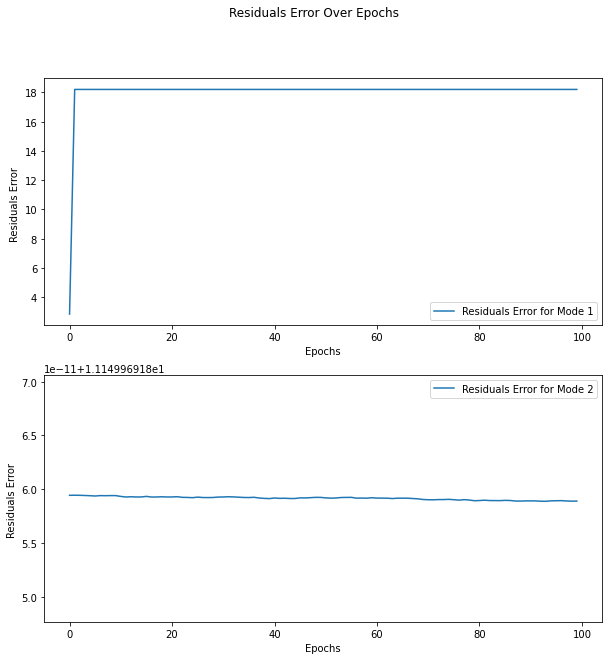

In [327]:
# Plot and label the training and validation loss values
epochs = len(residuals[0])
#plt.figure() #, dpi=200)
fig, axs = plt.subplots(2, figsize=(10, 10))
fig.suptitle('Residuals Error Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Residuals Error ')

axs[0].plot(range(epochs), residuals[0], label='Residuals Error for Mode 1')
axs[0].legend(loc='best')
axs[1].plot(range(epochs), residuals[1], label='Residuals Error for Mode 2') 
axs[1].legend(loc='best')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Residuals Error ')
plt.show()

In [328]:
factors_np.shape

(2, 12, 2)

In [329]:
factors_tl1 = np.array(factors_tl[1])
factors_tl1.shape

(2, 12, 2)

In [306]:
np.allclose(factors_np, factors_tl1)

False

In [307]:
factors_tl1

array([[[ 0.        ,  0.        ],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 3.02615419, -0.9178185 ],
        [ 3.02615419, -0.9178185 ],
        [ 3.02615419, -0.9178185 ],
        [ 3.02615419, -0.9178185 ],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 1.66009908,  1.11537933],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.41502477,  0.27884483],
        [ 0.41502477,  0.27884483],
        [ 0.41502477,  0.27884483],
        [ 0.41502477,  0.27884483],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.22767585, -0.33886631],
        [ 0.        ,  0.        ]]])

In [308]:
factors_np

array([[[ 0.        ,  0.        ],
        [ 0.00901945,  0.48252397],
        [ 0.00901945,  0.48252397],
        [ 0.00901945,  0.48252397],
        [ 0.63714166,  0.78198983],
        [ 0.63714166,  0.78198983],
        [ 0.63714166,  0.78198983],
        [ 0.63714166,  0.78198983],
        [ 0.00901945,  0.48252397],
        [ 0.00901945,  0.48252397],
        [ 0.00901945,  0.48252397],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 1.60636243, -0.03002651],
        [ 1.60636243, -0.03002651],
        [ 1.60636243, -0.03002651],
        [-0.99694674,  2.09107107],
        [-0.99694674,  2.09107107],
        [-0.99694674,  2.09107107],
        [-0.99694674,  2.09107107],
        [ 1.60636243, -0.03002651],
        [ 1.60636243, -0.03002651],
        [ 1.60636243, -0.03002651],
        [ 0.        ,  0.        ]]])